<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/housing_info_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing info analysis

data source: Kaggle: (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


In [ ]:
# [Problem 1] Acquiring a dataset

import pandas as pd
import numpy as np

# read data

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [ ]:
# [Problem 2] Examining the dataset itself

# Print the first few rows of the DataFrame
print(data.head())

# Get information about the DataFrame, including data types and missing values
print(data.info())

# Describe the numerical features of the DataFrame
print(data.describe())

# Check for missing values in each column
print(data.isnull().sum())

# Get the number of unique values for each column
print(data.nunique())

# Display the data types of each column
print(data.dtypes)

# Show the shape (rows, columns) of the DataFrame
print(data.shape)

# Display column names
print(data.columns)

# Sample 10 random rows from the dataframe
print(data.sample(10))


In [ ]:
# [Problem 3] Checking the data
# Display data overview
data.info()

# Check the position of the objective variable
print(data['SalePrice'].describe())

# Check basic statistics
print(data.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
# [Problem 4] Dealing with missing values
import missingno as msno

# Visualize missing values
msno.matrix(data)

# Calculate the percentage of missing values
missing_ratio = data.isnull().sum() / len(data)
print(missing_ratio[missing_ratio > 0])

# Objective variable
[Question 5] Terminology research

# **Summary of Terms:**  

1. **Kurtosis** – Measures how "tailed" or "peaked" a distribution is compared to a normal distribution i.e. Kurtosis: A measure of the concentration of a distribution
   - **High kurtosis** = Heavy tails and sharp peak (more outliers).  
   - **Low kurtosis** = Light tails and flatter peak (fewer outliers).  

2. **Skewness** – Measures the asymmetry of a distribution i.e. A measure of the asymmetry of a distribution
   - **Positive skew** = Right tail longer (mean > median).  
   - **Negative skew** = Left tail longer (mean < median).  
   - **Zero skew** = Symmetrical (e.g., normal distribution).  

These metrics help describe the shape of data distributions beyond just mean and variance.


kurtosis: 6.536281860064529, skewness: 1.8828757597682129


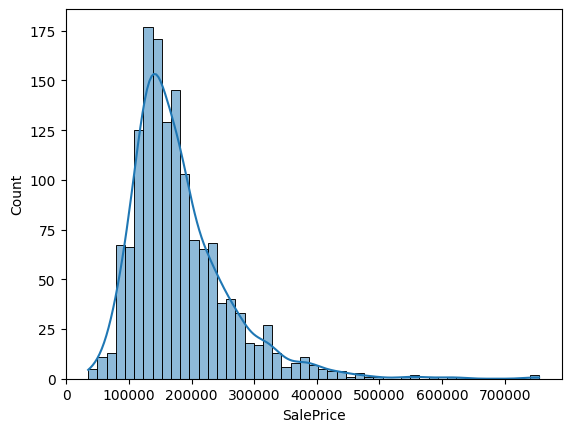

In [ ]:
# [Problem 6] Checking the distribution

import seaborn as sns
import numpy as np

# Check the distribution of the manifest variables
sns.histplot(data['SalePrice'], kde=True)

# Calculate kurtosis and skewness
print(f"kurtosis: {data['SalePrice'].kurtosis()}, skewness: {data['SalePrice'].skew()}")

kurtosis: 0.8095319958036296, skewness: 0.12133506220520406


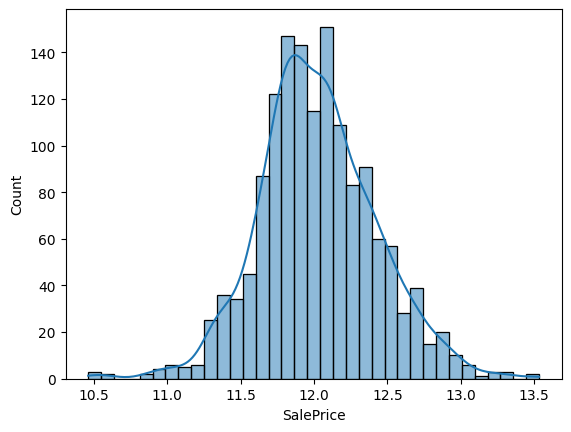

In [ ]:
# Logarithmic transformation
log_price = np.log(data['SalePrice'])

# Check the distribution after logarithmic transformation
sns.histplot(log_price, kde=True)

# Calculate kurtosis and skewness
print(f"kurtosis: {log_price.kurtosis()}, skewness: {log_price.skew()}")

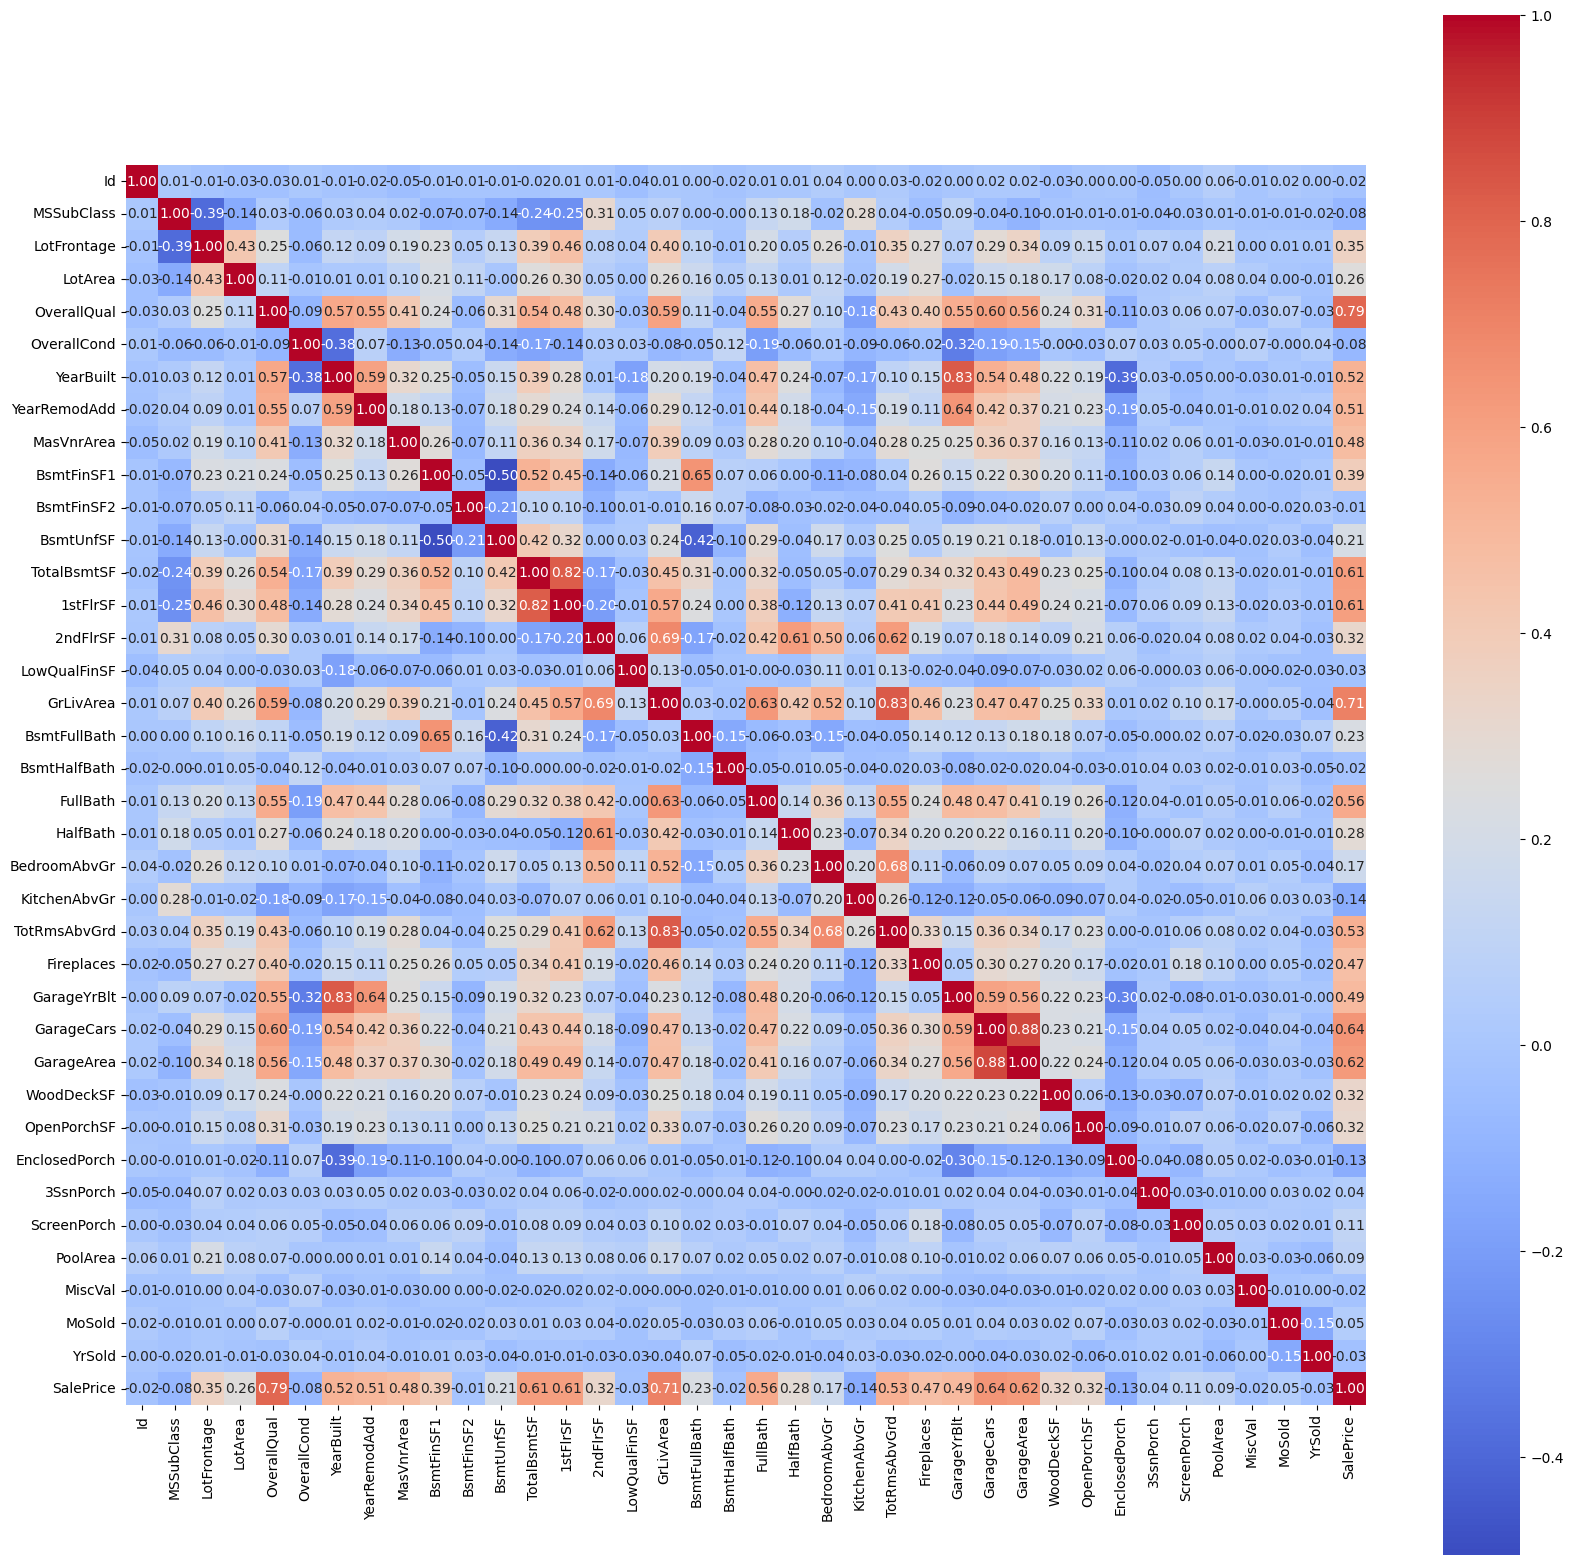

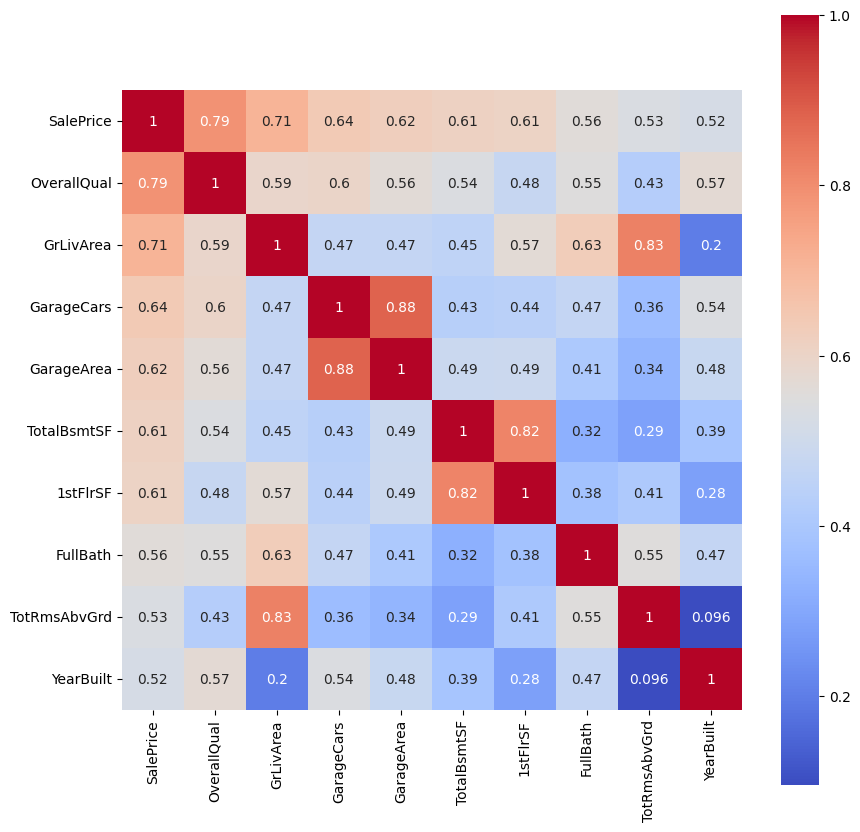

In [ ]:
import matplotlib.pyplot as plt

# Calculate correlation matrix
# corr = data.corr() - editted to avoid ValueError: could not convert string to float: 'RL'
corr = data.select_dtypes(include=np.number).corr()

# Display heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', square=True, annot=True, fmt=".2f")
plt.show()

# Display top 10 highly correlated features
top10_corr = corr.nlargest(10, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(10, 10))
sns.heatmap(data[top10_corr].corr(), annot=True, cmap='coolwarm', square=True)
plt.show()